### BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Algumas configurações para o matplotlib

In [3]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

#### IMPORTANDO OS DADOS DE TRAIN E TEST

In [4]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv')

#### TAMANHO DOS CONJUNTOS DE TRAIN E TEST

In [5]:
train.shape, test.shape

((13730, 166), (4570, 43))

#### SÃO 166 VARIÁVEIS DO CONJUNTO DE TREINO:

In [6]:
train.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=166)

#### SÃO 43 VARIÁVEIS DO CONJUNTO DE TEST 

In [7]:
 test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

### Os tipos das variáveis de train e test

In [8]:
print("Train: \n\n", train.dtypes.value_counts(),"\n\n Test: \n\n",test.dtypes.value_counts())

Train: 

 int64      78
object     60
float64    28
dtype: int64 

 Test: 

 int64      20
float64    12
object     11
dtype: int64


### VISUALIZANDO O CONJUNTO DE DADOS DE TRAIN

In [9]:
train.head(5)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


### VISUALIZANDO O CONJUNTO DE TEST

In [10]:
test.head(5)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


### PRÉ-PROCESSAMENTO DOS DADOS 

####  Tomaremos as variáveis que estão na interseção do conjunto de trian e test :

In [11]:
df_train = train[test.columns]
df_train['IN_TREINEIRO']=train['IN_TREINEIRO']

C:\Users\rodrigo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### RESUMO ESTATÍSTICO DAS VARIÁVEIS NUMÉRICAS

In [12]:
df_train.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,IN_TREINEIRO
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,4282.000000,13730.000000,...,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000
mean,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,2.259692,0.001238,...,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,0.129862
std,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.698586,0.035167,...,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,0.336163
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,0.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,0.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,...,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,0.000000
max,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,4.000000,1.000000,...,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,1.000000


### UM RESUMO PARA CADA VARIÁVEL DO CONJUNTO DE TRAIN

In [13]:
df_aux = pd.DataFrame({'Type': df_train.dtypes,
                      'Missing': df_train.isna().sum(),
                      'Size': df_train.shape[0],
                       'Unique': df_train.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux.sort_values(by='Missing_%', ascending=False)

,Type,Missing,Size,Unique,Missing_%
TP_DEPENDENCIA_ADM_ESC,float64,9448,13730,4,68.812819
TP_ENSINO,float64,9448,13730,3,68.812819
Q027,object,7373,13730,13,53.699927
NU_NOTA_REDACAO,float64,3597,13730,53,26.198106
NU_NOTA_LC,float64,3597,13730,2774,26.198106
TP_STATUS_REDACAO,float64,3597,13730,9,26.198106
NU_NOTA_COMP1,float64,3597,13730,15,26.198106
NU_NOTA_COMP2,float64,3597,13730,13,26.198106
NU_NOTA_COMP3,float64,3597,13730,12,26.198106
NU_NOTA_COMP4,float64,3597,13730,14,26.198106


 ##### PODEMOS OBSERVAR ALGUMAS VARIÁVEIS COM VALORES AUSENTES:
 
 A princípio removeremos as variáveis com valores ausentes acima de 50%:
 

In [14]:
df_train.drop(columns=['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027'], inplace=True)

test.drop(columns=['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027'], inplace=True)

C:\Users\rodrigo\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Feature Engineering

#### Convertendo as variáveis TP_COR_RACA, TP_SEXO, Q001 , Q002, Q006, Q024, Q025 e Q026 para valores inteiros (0 ou 1)

In [15]:
# MACULINO - M = 0, FEMININO - F = 1
df_train['TP_SEXO'].replace(['M','F'],[0,1],inplace=True)
test['TP_SEXO'].replace(['M','F'],[0,1],inplace=True)

# Acesso a internet = 1, sem internet = 0
df_train['Q025'].replace(['A','B'],[0,1],inplace=True)
test['Q025'].replace(['A','B'],[0,1],inplace=True)

C:\Users\rodrigo\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:
# dropar os não declarados
df_train=df_train.loc[df_train['TP_COR_RACA'] != 0]
test=test.loc[test['TP_COR_RACA'] != 0]

In [17]:
df_train = pd.get_dummies(df_train, columns=['SG_UF_RESIDENCIA','TP_COR_RACA','TP_ST_CONCLUSAO',
                                             'Q001', 'Q002', 'Q006', 'Q024', 'Q026','Q047'], 
                        prefix=['UF_RESIDENCIA','COR_RACA','ST_CONCLUSAO','Q001', 'Q002', 'Q006', 'Q024', 'Q026','Q047'])

test = pd.get_dummies(test, columns=['SG_UF_RESIDENCIA','TP_COR_RACA','TP_ST_CONCLUSAO',
                                             'Q001', 'Q002', 'Q006', 'Q024', 'Q026','Q047'], 
                        prefix=['UF_RESIDENCIA','COR_RACA','ST_CONCLUSAO','Q001', 'Q002', 'Q006', 'Q024', 'Q026','Q047'])

In [18]:
df_train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,...,Q024_D,Q024_E,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,0,1,4,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,1,1,0,2,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,21,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,28,0,1,4,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,18,1,1,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


##### Reduzindo a quantidade de dummies

In [19]:
df_train.drop(columns = ['Q025','TP_NACIONALIDADE','TP_ANO_CONCLUIU', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
                         'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'TP_STATUS_REDACAO', 'TP_LINGUA',
                         'TP_ESCOLA'], inplace=True)

test.drop(columns = ['Q025','TP_NACIONALIDADE','TP_ANO_CONCLUIU', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 
                        'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'TP_STATUS_REDACAO', 'TP_LINGUA', 
                        'TP_ESCOLA'], inplace=True)

In [20]:
# junta os que ganham mais que 5200
df_train['renda_>5280']=df_train['Q006_J']+df_train['Q006_K']+df_train['Q006_L']+df_train['Q006_M']+df_train['Q006_N']+df_train['Q006_O']+df_train['Q006_P']+df_train['Q006_Q']
df_train.drop(columns = ['Q006_J', 'Q006_K', 'Q006_L', 'Q006_M', 'Q006_N', 'Q006_O', 'Q006_P', 'Q006_Q' ], inplace=True)

test['renda_>5280']=test['Q006_J']+test['Q006_K']+test['Q006_L']+test['Q006_M']+test['Q006_N']+test['Q006_O']+test['Q006_P']+test['Q006_Q']
test.drop(columns = ['Q006_J', 'Q006_K', 'Q006_L', 'Q006_M', 'Q006_N', 'Q006_O', 'Q006_P', 'Q006_Q' ], inplace=True)

df_train['renda_>5280'].unique(), test['renda_>5280'].unique()

(array([0, 1], dtype=uint64), array([0, 1], dtype=uint64))

In [21]:
df_train.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'IN_TREINEIRO',
       'UF_RESIDENCIA_AC', 'UF_RESIDENCIA_AL', 'UF_RESIDENCIA_AM',
       'UF_RESIDENCIA_AP', 'UF_RESIDENCIA_BA', 'UF_RESIDENCIA_CE',
       'UF_RESIDENCIA_DF', 'UF_RESIDENCIA_ES', 'UF_RESIDENCIA_GO',
       'UF_RESIDENCIA_MA', 'UF_RESIDENCIA_MG', 'UF_RESIDENCIA_MS',
       'UF_RESIDENCIA_MT', 'UF_RESIDENCIA_PA', 'UF_RESIDENCIA_PB',
       'UF_RESIDENCIA_PE', 'UF_RESIDENCIA_PI', 'UF_RESIDENCIA_PR',
       'UF_RESIDENCIA_RJ', 'UF_RESIDENCIA_RN', 'UF_RESIDENCIA_RO',
       'UF_RESIDENCIA_RR', 'UF_RESIDENCIA_RS', 'UF_RESIDENCIA_SC',
       'UF_RESIDENCIA_SE', 'UF_RESIDENCIA_SP', 'UF_RESIDENCIA_TO',
       'COR_RACA_1', 'COR_RACA_2', 'COR_RACA

## Recursive Feature Elimination (RFE) e verificando a relevância das variáveis

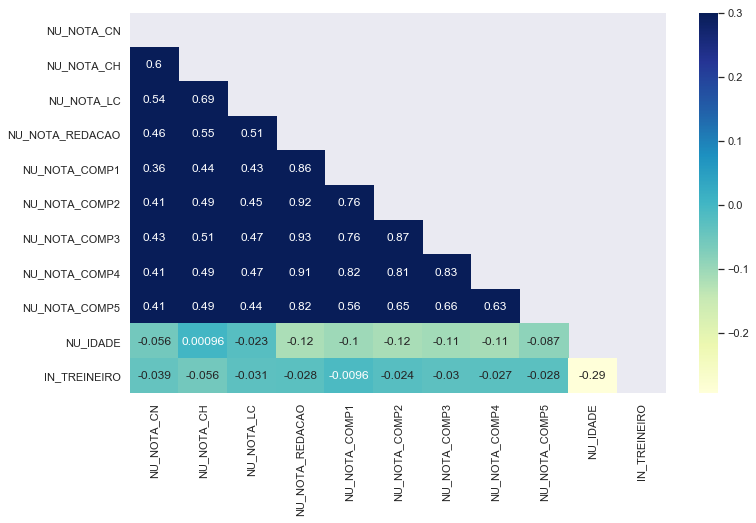

In [22]:
#Verificando a correlação das variáveis contínuas com a variável target (NU_NOTA_MT)
corr = df_train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_COMP1',
                  'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_IDADE','IN_TREINEIRO']].corr()
plt.figure(figsize=(12,7))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,annot=True,mask=mask, vmax=.3,cmap="YlGnBu")

Podemos observar uma forte correlação entre cada nota de competência de redação com a nota de redação; diante disso, o interessante é removê-las, pois, podemos ter problemas de autocorrelação.

In [23]:
df_train.drop(columns = ['NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP3', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1'], inplace=True)

test.drop(columns = ['NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP3', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1'], inplace=True)

## Verificando a correlação das variáveis com a variável target (IN_TREINEIRO')

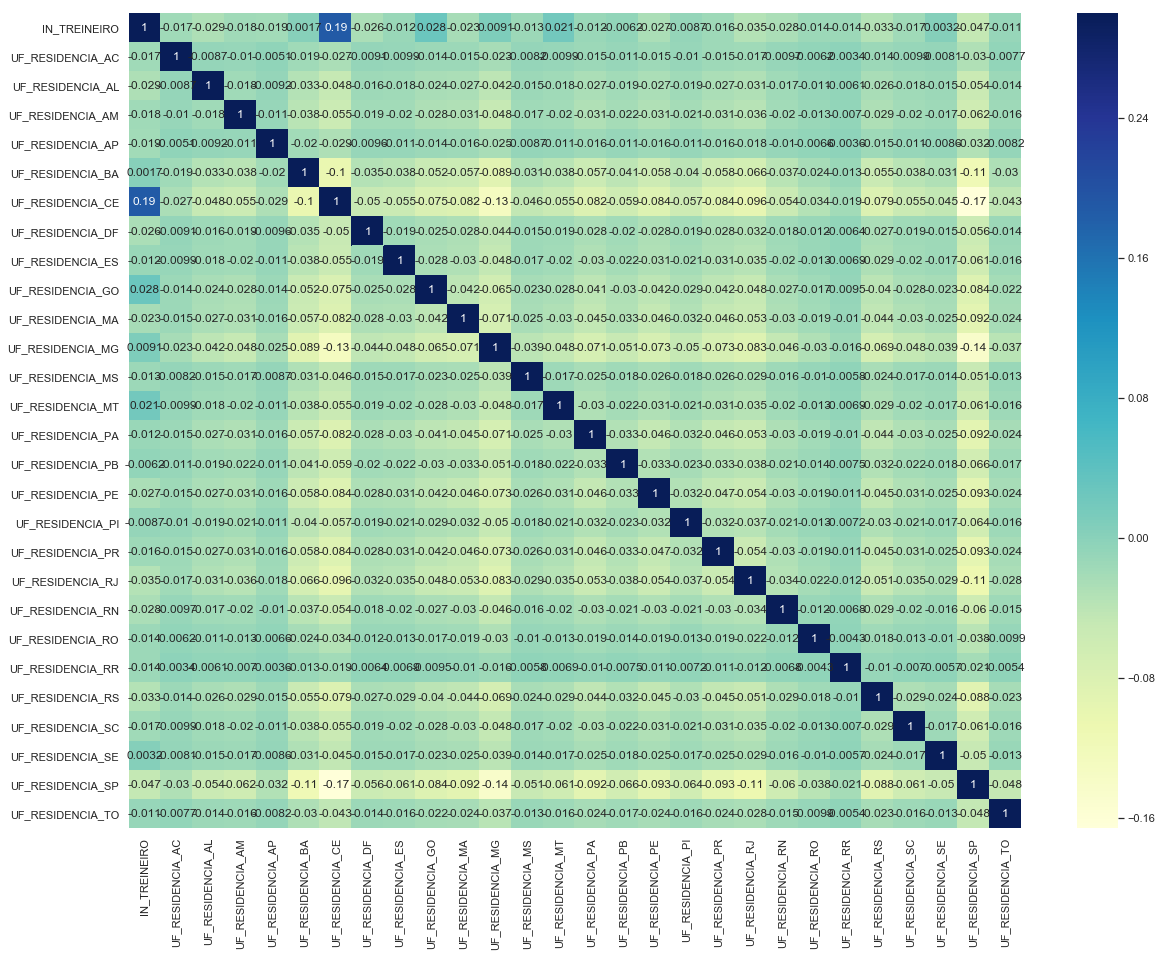

In [24]:
corr = df_train[['IN_TREINEIRO','UF_RESIDENCIA_AC', 'UF_RESIDENCIA_AL', 'UF_RESIDENCIA_AM','UF_RESIDENCIA_AP', 'UF_RESIDENCIA_BA', 
                 'UF_RESIDENCIA_CE','UF_RESIDENCIA_DF', 'UF_RESIDENCIA_ES', 'UF_RESIDENCIA_GO','UF_RESIDENCIA_MA', 
                 'UF_RESIDENCIA_MG', 'UF_RESIDENCIA_MS','UF_RESIDENCIA_MT', 'UF_RESIDENCIA_PA', 'UF_RESIDENCIA_PB',
                 'UF_RESIDENCIA_PE', 'UF_RESIDENCIA_PI', 'UF_RESIDENCIA_PR','UF_RESIDENCIA_RJ', 'UF_RESIDENCIA_RN',
                 'UF_RESIDENCIA_RO','UF_RESIDENCIA_RR', 'UF_RESIDENCIA_RS', 'UF_RESIDENCIA_SC','UF_RESIDENCIA_SE', 
                 'UF_RESIDENCIA_SP', 'UF_RESIDENCIA_TO']].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,vmax=.3,cmap="YlGnBu")

Podemos verificar que o estado do candidato não parece ser relevante para explicar a target IN_TREINEIRO

In [47]:
df_train.drop(columns = ['UF_RESIDENCIA_AC', 'UF_RESIDENCIA_AL', 'UF_RESIDENCIA_AM','UF_RESIDENCIA_AP', 'UF_RESIDENCIA_BA', 
                 'UF_RESIDENCIA_CE','UF_RESIDENCIA_DF', 'UF_RESIDENCIA_ES', 'UF_RESIDENCIA_GO','UF_RESIDENCIA_MA', 
                 'UF_RESIDENCIA_MG', 'UF_RESIDENCIA_MS','UF_RESIDENCIA_MT', 'UF_RESIDENCIA_PA', 'UF_RESIDENCIA_PB',
                 'UF_RESIDENCIA_PE', 'UF_RESIDENCIA_PI', 'UF_RESIDENCIA_PR','UF_RESIDENCIA_RJ', 'UF_RESIDENCIA_RN',
                 'UF_RESIDENCIA_RO','UF_RESIDENCIA_RR', 'UF_RESIDENCIA_RS', 'UF_RESIDENCIA_SC','UF_RESIDENCIA_SE', 
                 'UF_RESIDENCIA_SP', 'UF_RESIDENCIA_TO'], inplace=True)

test.drop(columns = ['UF_RESIDENCIA_AC', 'UF_RESIDENCIA_AL', 'UF_RESIDENCIA_AM','UF_RESIDENCIA_AP', 'UF_RESIDENCIA_BA', 
                 'UF_RESIDENCIA_CE','UF_RESIDENCIA_DF', 'UF_RESIDENCIA_ES', 'UF_RESIDENCIA_GO','UF_RESIDENCIA_MA', 
                 'UF_RESIDENCIA_MG', 'UF_RESIDENCIA_MS','UF_RESIDENCIA_MT', 'UF_RESIDENCIA_PA', 'UF_RESIDENCIA_PB',
                 'UF_RESIDENCIA_PE', 'UF_RESIDENCIA_PI', 'UF_RESIDENCIA_PR','UF_RESIDENCIA_RJ', 'UF_RESIDENCIA_RN',
                 'UF_RESIDENCIA_RO','UF_RESIDENCIA_RR', 'UF_RESIDENCIA_RS', 'UF_RESIDENCIA_SC','UF_RESIDENCIA_SE', 
                 'UF_RESIDENCIA_SP', 'UF_RESIDENCIA_TO'], inplace=True)

### Verificando a correlação das variáveis com a variável target ('IN_TREINEIRO')

In [53]:
corr = df_train[['IN_TREINEIRO', 'TP_SEXO',
                 'COR_RACA_1', 'COR_RACA_2', 'COR_RACA_3', 'COR_RACA_4', 
                 'COR_RACA_5','ST_CONCLUSAO_1', 'ST_CONCLUSAO_2', 'ST_CONCLUSAO_3', 'ST_CONCLUSAO_4', 
                 'Q001_A', 'Q001_B', 'Q001_C','Q001_D', 'Q001_E', 'Q001_F', 'Q001_G', 'Q001_H',
                 'Q002_A', 'Q002_B','Q002_C', 'Q002_D', 'Q002_E', 'Q002_F', 'Q002_G', 'Q002_H', 'Q006_A','Q006_B', 
                 'Q006_C', 'Q006_D', 'Q006_E', 'Q006_F', 'Q006_G', 'Q006_H','Q006_I', 'Q026_A', 'Q026_B', 'Q026_C', 
                 'renda_>5280']].corr()
corr.loc[:,['IN_TREINEIRO']]

,IN_TREINEIRO
IN_TREINEIRO,1.000000
TP_SEXO,0.026624
COR_RACA_1,0.006354
COR_RACA_2,-0.038818
COR_RACA_3,0.014863
COR_RACA_4,0.012509
COR_RACA_5,0.009973
ST_CONCLUSAO_1,-0.368500
ST_CONCLUSAO_2,-0.260162
ST_CONCLUSAO_3,0.859951


Verificamos IN_TREINEIRO está altamente correlacionado com ST_CONCLUSAO_3

#### SELECIONANDO VARIÁVEIS MAIS BEM CORRELACIONADAS

In [66]:
df_analise = df_train[['NU_IDADE','ST_CONCLUSAO_1','ST_CONCLUSAO_2','ST_CONCLUSAO_3','Q026_A','IN_TREINEIRO']]

test = test[['NU_INSCRICAO','NU_IDADE','ST_CONCLUSAO_1','ST_CONCLUSAO_2','ST_CONCLUSAO_3','Q026_A']]

### VISUALIZANDO AS VARIÁVEIS

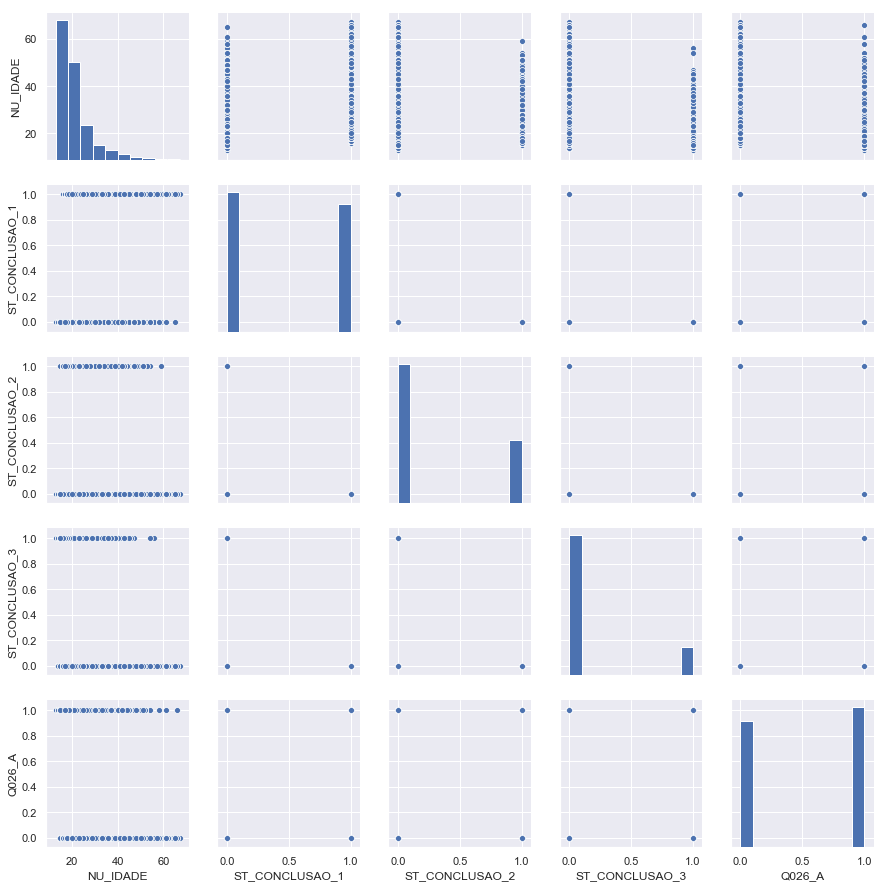

In [65]:
sns.pairplot(df_analise)

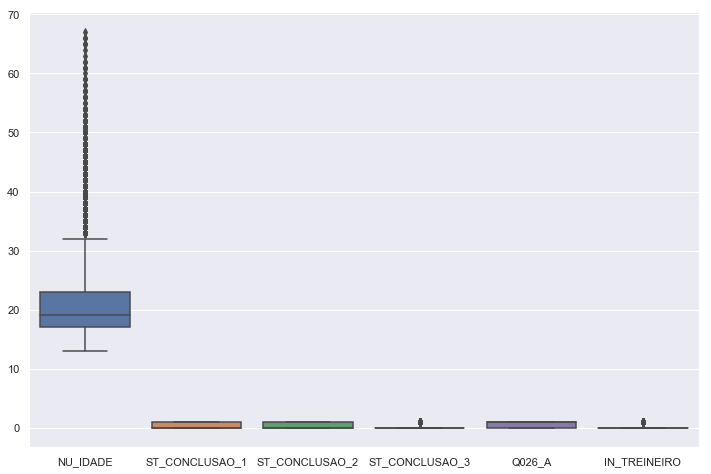

In [68]:
sns.boxplot(data=df_analise)

C:\Users\rodrigo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


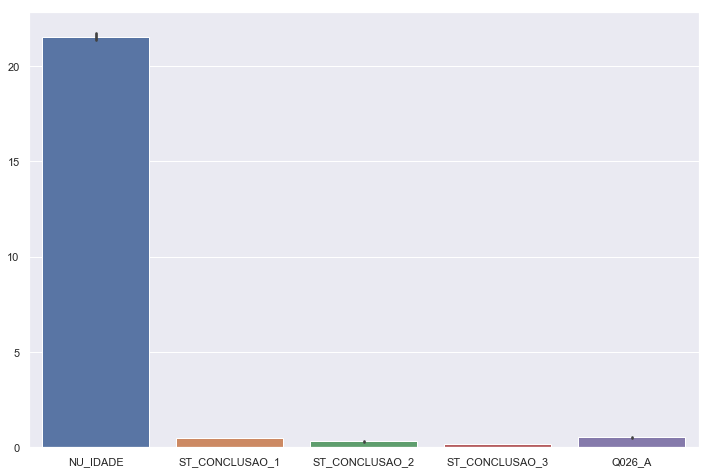

In [69]:
sns.barplot(data=test)

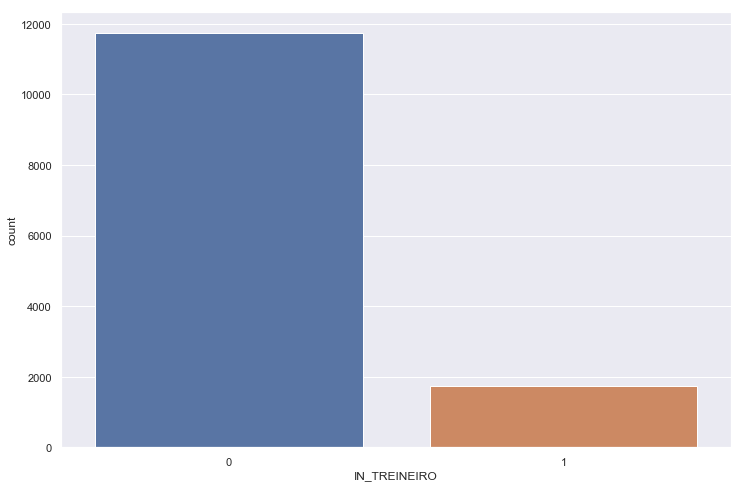

In [74]:
sns.countplot(df_analise['IN_TREINEIRO'])

In [75]:
test.describe()

,NU_IDADE,ST_CONCLUSAO_1,ST_CONCLUSAO_2,ST_CONCLUSAO_3,Q026_A
count,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000
mean,21.527512,0.483181,0.311428,0.165738,0.520606
std,6.779387,0.499773,0.463129,0.371887,0.499631
min,14.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,0.000000,0.000000,0.000000,1.000000
75%,23.000000,1.000000,1.000000,0.000000,1.000000
max,63.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
df_analise.head(5)

,NU_IDADE,ST_CONCLUSAO_1,ST_CONCLUSAO_2,ST_CONCLUSAO_3,Q026_A,IN_TREINEIRO
1,24,1,0,0,0,0
2,17,0,1,0,1,0
3,21,0,0,1,1,0
5,28,1,0,0,0,0
6,18,1,0,0,1,0


In [101]:
NU_INSCRICAO = test['NU_INSCRICAO']

### PREVISÕES

In [78]:
y = df_analise['IN_TREINEIRO']
X = df_analise.drop(columns=['IN_TREINEIRO'])

### DIVIDINDO O CONJUNTO DE DADOS PARA TRAIN E TEST

In [82]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42) 
score_list = []

### IMPLEMENTANDO ALGORITMO DE CLASSIFICAÇÃO 

### Logistic Regression 

In [83]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()

lr.fit(X_train,y_train)#fit or train data

print('Logistic Regression Score : ',lr.score(X_test,y_test))#Ratio of correct predictions

score_list.append(lr.score(X_test,y_test))

Logistic Regression Score :  0.991475166790215


C:\Users\rodrigo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [91]:
lr_prediction = lr.predict(test.iloc[:,1:])

### K-Nearest Neighbors

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)

print('K-Nearest Neighbors Score : ',knn.score(X_test,y_test))

score_list.append(knn.score(X_test,y_test))

K-Nearest Neighbors Score :  0.997405485544848


In [92]:
knn_prediction = knn.predict(test.iloc[:,1:])

### Support Vector Machine

In [86]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)

svm.fit(X_train,y_train)

print('Super Vector Machine Score : ',svm.score(X_test,y_test))

score_list.append(svm.score(X_test,y_test))

Super Vector Machine Score :  0.997405485544848


C:\Users\rodrigo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [93]:
svm_prediction = svm.predict(test.iloc[:,1:])

### Naive Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

print('Naive Bayes Score : ',nb.score(X_test,y_test))

score_list.append(nb.score(X_test,y_test))

Naive Bayes Score :  0.9733135656041513


In [94]:
nb_prediction = nb.predict(test.iloc[:,1:])

### Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

print('Decision Tree Score : ',dt.score(X_test,y_test))

score_list.append(dt.score(X_test,y_test))

Decision Tree Score :  0.997405485544848


In [95]:
dt_prediction = dt.predict(test.iloc[:,1:])

### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 22,random_state = 40)

rf.fit(X_train,y_train)

print('Random Forest Score : ',rf.score(X_test,y_test))

score_list.append(rf.score(X_test,y_test))

Random Forest Score :  0.997405485544848


In [96]:
rf_prediction = rf.predict(test.iloc[:,1:])

### Comparando os algoritmo de classificação


In [98]:
pr_dict = {'Logistic Regression' : lr_prediction,'KNN' : knn_prediction,'SVM' : svm_prediction,
           'Naive Bayes' : nb_prediction,'Decision Tree' : dt_prediction, 'Random Forest' : rf_prediction}

all_predictions = pd.DataFrame(pr_dict)

all_predictions.head(5)

,Logistic Regression,KNN,SVM,Naive Bayes,Decision Tree,Random Forest
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,1,1,1,1,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0


### PREPARANDO ENVIO FINAL

In [99]:
final_prediction = [] #final prediction list

#i : range columns , j : range rows

for i in all_predictions.values:
    sum_zero_score = 0 #summary of zero scores
    
    sum_one_score = 0 #summary of one scores
    
    for j in range(5):
        if i[j]==0:
            sum_zero_score += score_list[j]
        else:
            sum_one_score += score_list[j]
    
    if sum_zero_score >= sum_one_score:
        final_prediction.append(0)
    else:
        final_prediction.append(1)

### RECEBENDO PREDIÇÕES DE CONJUNTO DE TEST

In [102]:
answer = {'NU_INSCRICAO' : NU_INSCRICAO,'IN_TREINEIRO' : final_prediction}

submission = pd.DataFrame(answer)

submission.to_csv('answer.csv', index = False)

### ABRINDO O ARQUIVO CSV 

In [103]:
answer = pd.read_csv('answer.csv')
answer.head(5)

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
